<a href="https://colab.research.google.com/github/MilanSinghBisht/collab-works/blob/main/CIFAR_10_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets,layers,models

In [22]:
(X_train,y_train),(X_test,Y_test) =datasets.cifar10.load_data()

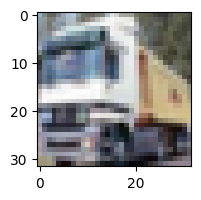

In [23]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])

In [24]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [25]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [26]:
X_train = X_train / 255
X_test = X_test / 255

In [28]:
# Defining the CNN
cnn = models.Sequential([
    layers.Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu',input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu',input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
cnn.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [31]:
cnn.fit(X_train,y_train,epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 35ms/step - accuracy: 0.3708 - loss: 1.7266
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.5706 - loss: 1.2235
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 33ms/step - accuracy: 0.6242 - loss: 1.0745
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.6532 - loss: 0.9901
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.6756 - loss: 0.9314
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.6871 - loss: 0.8967
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.7041 - loss: 0.8451
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.7216 - loss: 0.8013
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.7277 - loss: 0.7723
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.7374 - loss: 0.7507


In [35]:
cnn.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6614 - loss: 0.9795


[0.9932376146316528, 0.6640999913215637]

In [36]:

classes= ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [39]:
Y_test = Y_test.reshape(-1,)
Y_test[:5,]

array([3, 8, 8, 0, 6], dtype=uint8)

In [45]:
y_pred = cnn.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


In [47]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 1, 0, 6]

In [48]:
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [53]:
from sklearn.metrics import classification_report
print("Classification Classes\n ", classification_report(Y_test , y_classes))

Classification Classes
                precision    recall  f1-score   support

           0       0.67      0.76      0.72      1000
           1       0.71      0.87      0.78      1000
           2       0.47      0.60      0.53      1000
           3       0.53      0.44      0.48      1000
           4       0.71      0.50      0.59      1000
           5       0.69      0.45      0.54      1000
           6       0.62      0.86      0.72      1000
           7       0.79      0.66      0.72      1000
           8       0.78      0.80      0.79      1000
           9       0.74      0.70      0.72      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000

